In [66]:
%matplotlib inline

In [1]:
#modules
import pandas as pd
import numpy as np
import Quandl as q
import pickle
import datetime
import matplotlib.pyplot as plt

# defining style
from matplotlib import style
style.use("fivethirtyeight")

#Quandl API key
api_key = "ZeTUAsZV7Vz4HFa7jsFk"

In [2]:
#extracting the state abbreviations from wiki
def state_list():
    all_state = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states")
    #print(all_state[0][0][1:])
    return all_state[0][0][1:]

#state_list()

In [19]:
#function to get data from Quandl using the API
def get_quandl_data():
    all_states = state_list() #storing the states
    main_df = pd.DataFrame() #defining empty dataframe
    
    for each_state in all_states:
        query = "FMAC/HPI_"+str(each_state)
        df = q.get(query, authtoken = api_key)
        df[each_state] = (df[each_state]-df[each_state][0])/df[each_state][0] * 100.0
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    #print(main_df[[0]])
    main_df.to_pickle("state_data.pickle")
    
get_quandl_data()



In [20]:
#print(state_data_df["AL"][0])
#print(state_data_df.AL[0])
#x =(state_data_df["AL"]-state_data_df["AL"][0]) / state_data_df["AL"][0] * 100.0
#print(x)

#reading the data from pickle
state_data_df = pd.read_pickle("state_data.pickle")

In [21]:
#function to get house price index data for entire USA as a benchmark
def Index_USA():
    df = q.get("FMAC/HPI_USA", authtoken=api_key)
    df["United States                  not seasonally adjusted"] = (df["United States                  not seasonally adjusted"]-df["United States                  not seasonally adjusted"][0]) / df["United States                  not seasonally adjusted"][0] * 100.0
    return df

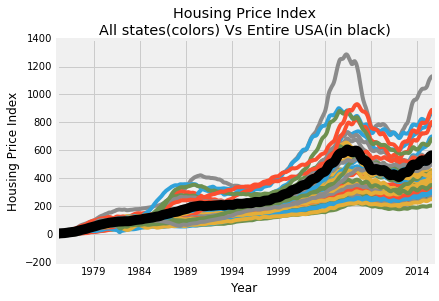

In [67]:
#collecting the benchmark data
benchmark = Index_USA()


#Plotting of housing price index for all the states VS housing price index for entire USA (benchmark)
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

    
state_data_df.plot(ax = ax1)
benchmark.plot(ax = ax1, color = "k", linewidth = 10)
plt.xlabel("Year")
plt.ylabel("Housing Price Index")
plt.title("Housing Price Index\nAll states(colors) Vs Entire USA(in black)")
plt.legend().remove()
plt.show()

* We can see that the housing price Index for all the individual states(shown in colors) follows a similar pattern to the housing price index of the entire United States(shown in black).

In [40]:
#function for collecting mortgage data from quandl

def mortgage_data():
    df = q.get("FMAC/MORTG", trim_start="1975-01-01", authtoken=api_key)
    df["Value"] = (df["Value"]-df["Value"][0]) / df["Value"][0] * 100.0
    df=df.resample('1D')
    df=df.resample('M')
    return df

In [47]:
#getting mortgage data
mortgage = mortgage_data()

#renaming column
mortgage.columns = ["Mortgage Rate"]
benchmark.columns = ["USA_Index"]

In [49]:
#joining benchmark & mortgage into a single column

bench_mort = benchmark.join(mortgage)
#print(bench_mort)

In [50]:
#calculating correlation between USA Index & Mortgage rate change
print(bench_mort.corr())

               USA_Index  Mortgage Rate
USA_Index       1.000000      -0.766493
Mortgage Rate  -0.766493       1.000000


* There is a negative correlation of around 77% between the rate of change of housing price index of the entire united states and rate of change of the mortgage value over a period of 40 years. 

* This implies that the changes between these 2 quantities has basically diverged over the years.

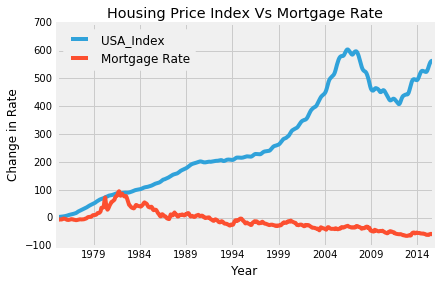

In [68]:
bench_mort.plot()
plt.xlabel("Year")
plt.ylabel("Change in Rate")
plt.title("Housing Price Index Vs Mortgage Rate")
plt.show()

* We can see that the housing price index & mortgage rates start following a similar pattern for the initial few years , but as the time progresses, the patters start to diverge.

In [64]:
#joining state data
statewise_mort = state_data_df.join(mortgage)
print(statewise_mort.corr()["Mortgage Rate"])

AL              -0.786039
AK              -0.718194
AZ              -0.654546
AR              -0.776184
CA              -0.717576
CO              -0.776866
CT              -0.743841
DE              -0.780571
FL              -0.663210
GA              -0.737242
HI              -0.783679
ID              -0.753248
IL              -0.770356
IN              -0.795171
IA              -0.809330
KS              -0.776788
KY              -0.808619
LA              -0.721165
ME              -0.792335
MD              -0.756992
MA              -0.784161
MI              -0.708697
MN              -0.752175
MS              -0.778339
MO              -0.772849
MT              -0.786099
NE              -0.788938
NV              -0.574745
NH              -0.748789
NJ              -0.765554
NM              -0.755110
NY              -0.794366
NC              -0.794287
ND              -0.778897
OH              -0.770942
OK              -0.669922
OR              -0.779097
PA              -0.803065
RI          

* We Can see that Nevada has the best correlation beteen housing price index & mortgage rate whereas South Dakota has the worst.